In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from pca import pca
import seaborn as sns

In [36]:
proteins = pd.read_csv("C:\\Aalesh and Mandar\\Datasets\\Protein.csv")

In [50]:
proteins.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


In [38]:
protein = proteins.drop("Country", axis=1)

In [39]:
protein.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


In [40]:
scalar = StandardScaler()

In [41]:
scaled_protein = scalar.fit_transform(protein)

In [42]:
pca = PCA()

In [43]:
prin_comp = pca.fit_transform(scaled_protein)

In [44]:
print(pca.explained_variance_)

[4.17337247 1.70312442 1.17491615 0.99444163 0.483165   0.3386781
 0.28292327 0.1211374  0.10324157]


In [45]:
print(pca.explained_variance_ratio_ * 100)

[44.51597304 18.16666052 12.53243894 10.60737739  5.15375995  3.61256635
  3.01784816  1.29213227  1.10124338]


Text(0, 0.5, 'Cumulative percentage variation explained')

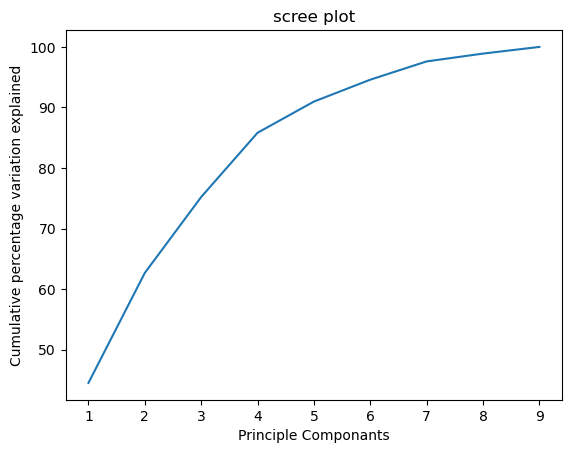

In [46]:
ys=np.cumsum(pca.explained_variance_ratio_ * 100)
xs=np.arange(1,10)
plt.plot(xs, ys)
plt.title("scree plot")
plt.xlabel("Principle Componants")
plt.ylabel("Cumulative percentage variation explained")

In [47]:
pd_PC = pd.DataFrame(prin_comp,columns = ["PC"+str(i) for i in np.arange(1,10)])

In [49]:
pd_PC["Country"] = proteins["Country"]

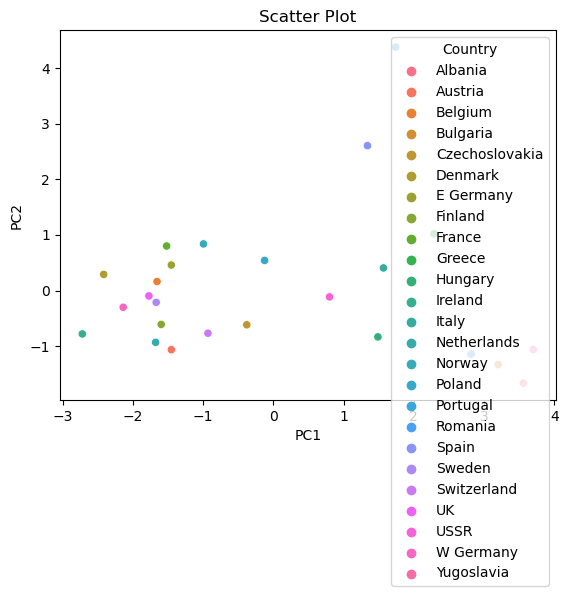

In [51]:
sns.scatterplot(data=pd_PC, x="PC1", y="PC2", hue="Country")
plt.title("Scatter Plot")
plt.show()

In [52]:
scaled_protein = pd.DataFrame(scaled_protein, columns = protein.columns, index=protein.index)

In [55]:
model = pca()

In [56]:
results = model.fit_transform(scaled_protein)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [9] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [7] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [9] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[7]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [25] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [25] unique colors! Available unique colors: [9].


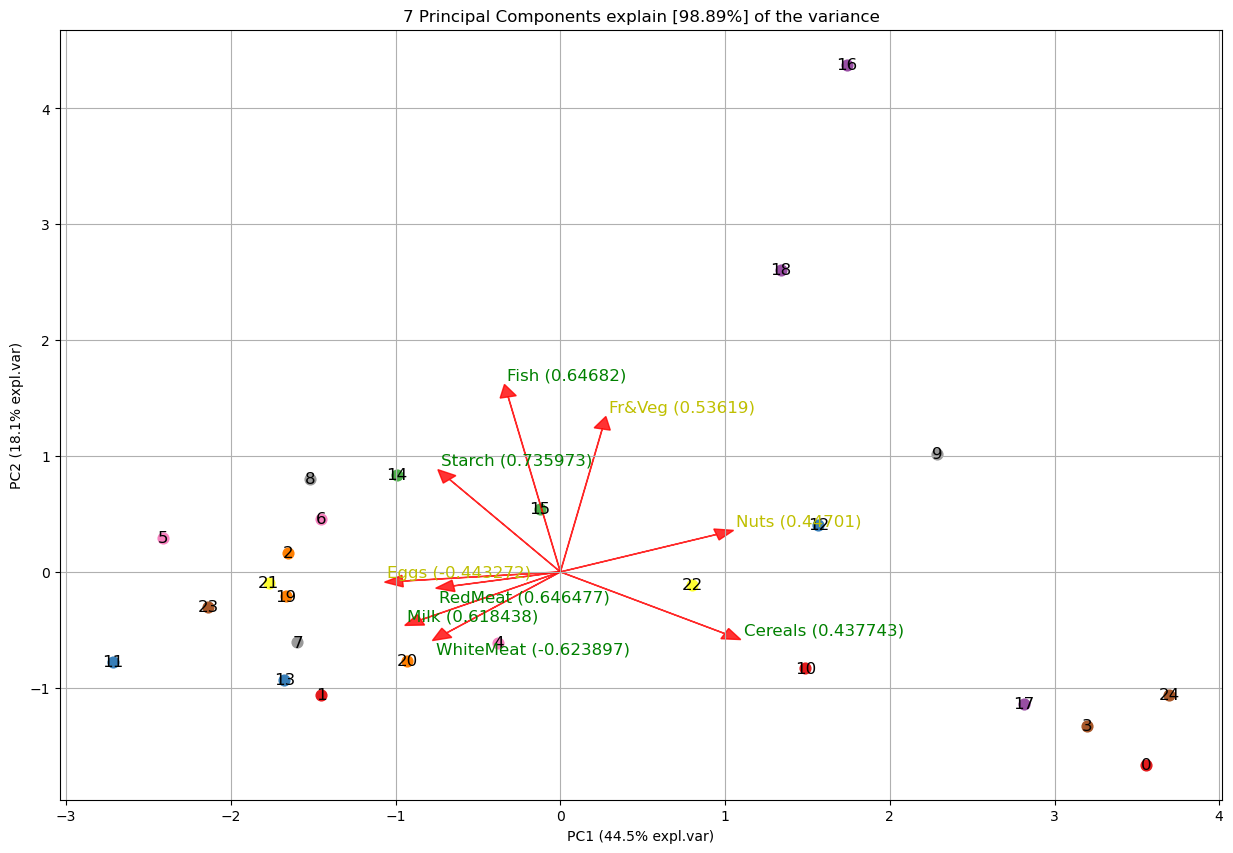

In [57]:
fig, ax = model.biplot(label=True, legend=False)

In [68]:
km = KMeans(n_clusters=5, random_state = 100)
km.fit(scaled_protein)

KMeans(n_clusters=5, random_state=100)

In [69]:
labels = km.predict(scaled_protein)

In [70]:
protein["Cluster"] = labels

In [71]:
protein

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg,Cluster
0,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7,1
1,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3,3
2,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0,3
3,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2,1
4,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0,4
5,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4,0
6,8.4,11.6,3.7,11.1,5.4,24.6,6.5,0.8,3.6,4
7,9.5,4.9,2.7,33.7,5.8,26.3,5.1,1.0,1.4,0
8,18.0,9.9,3.3,19.5,5.7,28.1,4.8,2.4,6.5,3
9,10.2,3.0,2.8,17.6,5.9,41.7,2.2,7.8,6.5,2


In [72]:
protein.groupby("Cluster").mean()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
Cluster,,,,,,,,,
0,9.8500,7.0500,3.1500,26.6750,8.225,22.675,4.550,1.1750,2.125
1,7.1250,4.6750,1.2000,9.4500,0.750,51.125,1.950,5.0500,2.975
2,8.1250,3.8000,2.4750,11.2000,7.625,33.675,3.975,5.6750,7.075
3,13.2125,10.6375,3.9875,21.1625,3.375,24.700,4.650,2.0625,4.175
4,7.9200,10.0400,2.8400,13.8400,2.740,35.740,5.560,2.5400,4.260


In [73]:
km.inertia_

74.94105991048842

In [74]:
wss = []
for i in np.arange(2,10):
    km=KMeans(n_clusters = i, random_state=2022)
    km.fit(scaled_protein)
    wss.append(km.inertia_)

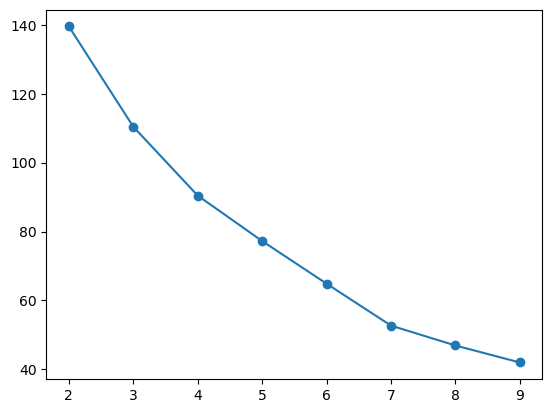

In [75]:
plt.scatter(np.arange(2,10), wss)
plt.plot(np.arange(2,10), wss)

In [76]:
sil = []
for i in np.arange(2,10):
    km=KMeans(n_clusters = i, random_state=2022)
    km.fit(scaled_protein)
    labels = km.predict(scaled_protein)
    sil.append(silhouette_score(scaled_protein, labels))

In [77]:
ks = np.arange(2,10)
i_max = np.argmax(sil)
best_k = ks[i_max]
print("Best K = ",best_k)

Best K =  3


In [86]:
km = KMeans(n_clusters=best_k,  random_state=2022)
km.fit(scaled_protein)
labels = km.predict(scaled_protein)

In [87]:
pd_PC = pd.DataFrame(prin_comp,columns = ["PC"+str(i) for i in np.arange(1,10)])

In [88]:
pd_PC["Cluster"] = labels

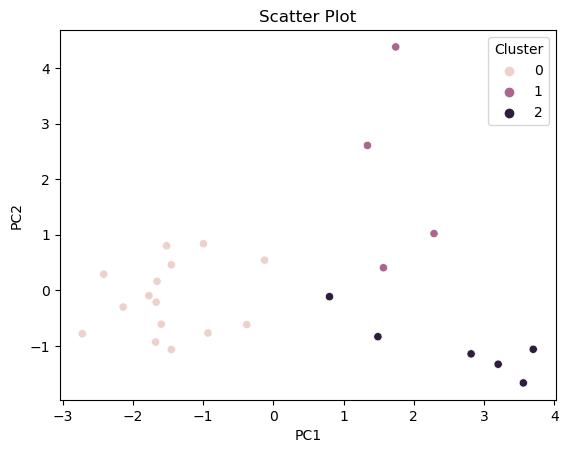

In [89]:
sns.scatterplot(data=pd_PC, x="PC1", y="PC2", hue="Cluster")
plt.title("Scatter Plot")
plt.show()